Please **submit this Jupyter notebook through Canvas** no later than **Monday November 16, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

YOUR ANSWER HERE


MeifangLi_13043390


YuhaoQian_13011456

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph. It is **not** allowed to use numpy.polyfit, but you may have a look at the documentation to see some examples.

In [1]:
import numpy as np
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

In [2]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
#w=at+b
A = np.vstack([t, np.ones(len(t))]).T
a, b= np.linalg.lstsq(A, w, rcond=None)[0]

In [3]:
#w=ct^2+dt+e
B = np.vstack([np.ones(len(t)),t,t**2]).T
e, d, c=np.linalg.lstsq(B, w, rcond=None)[0]

In [4]:
#w=ft^3+gt^2+ht+i
C = np.vstack([np.ones(len(t)),t,t**2, t*t*t]).T
i, h, g, f=np.linalg.lstsq(C, w, rcond=None)[0]

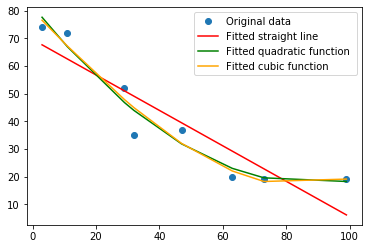

In [5]:
plt.plot(t, w, 'o', label='Original data', markersize=6)
plt.plot(t, a*t + b, 'r', label='Fitted straight line')
plt.plot(t, c*(t**2) + d*t + e, 'g', label='Fitted quadratic function ')
plt.plot(t, f*(t*t*t) +g*(t**2) + h*t + i, 'orange', label='Fitted cubic function')
plt.legend(loc="best")
plt.show()

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [6]:
# YOUR CODE HERE
from numpy import linalg as LA
A_cond_2=LA.cond(A,2)
B_cond_2=LA.cond(B,2)
C_cond_2=LA.cond(C,2)
print('straight:',A_cond_2)
print('quadratic:',B_cond_2)
print('cubic:',C_cond_2)

straight: 95.97978844376208
quadratic: 10562.21478918897
cubic: 1192946.8771575496


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

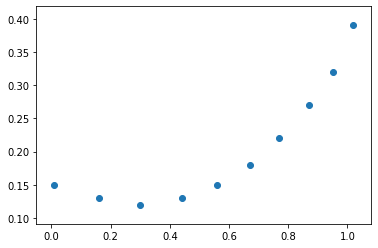

In [7]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

import matplotlib.pyplot as plt
t = np.linspace(0, 2*np.pi, 101)

plt.scatter(x,y)
plt.show()

In [8]:
# YOUR CODE HERE
import math

def solve(m,n):
    array_list=[]
    for k in range(len(m)):
        w=np.zeros(5)
        w[0]=n[k]**2
        w[1]=m[k]*n[k]
        w[2]=m[k]
        w[3]=n[k]
        w[4]=1
        array_list.append(w)
    return array_list

#A*x.^2 + B*x.*y + C*y.^2 + D*x + E*y + F=0
def solve_ellipse(A,B,C,D,E,F):
            
    Xc = (B*E-2*C*D)/(4*A*C-B**2)#x-position of the center
    Yc = (B*D-2*A*E)/(4*A*C-B**2)#y-position of the center
        
    FA1 = 2*(A*Xc**2+C*Yc**2+B*Xc*Yc-F)
    FA2 = np.sqrt((A-C)**2+B**2)
    
    MA = np.sqrt(FA1/(A+C+FA2)) #long axis
    SMA= np.sqrt(FA1/(A+C-FA2)) if A+C-FA2!=0 else 0#minor axis
    
    if B==0 and F*A<F*C:
        Theta = 0
    elif B==0 and F*A>=F*C:
        Theta = 90
    elif B!=0 and F*A<F*C:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 0.5*(-90-alpha) if alpha<0 else 0.5*(90-alpha) #rotation angle
    else:
        alpha = np.arctan((A-C)/B)*180/np.pi
        Theta = 90+0.5*(-90-alpha) if alpha<0 else 90+0.5*(90-alpha)
            
    if MA<SMA:
        MA,SMA = SMA,MA
            
    return [Xc,Yc,MA,SMA,Theta]

def get_ellipse(e_x, e_y, a, b, e_angle):
    """
    Args:
        e_x ([type]): x-position of the center
        e_y ([type]): y-position of the center
        a ([type]): long axis
        b ([type]): minor axis
        e_angle ([type]): rotation angle

    Returns:
        [type]: [x，y trait]
    """
    angles_circle = np.arange(0, 2 * np.pi, 0.01)
    x = []
    y = []
    for angles in angles_circle:
        or_x = a * math.cos(angles)
        or_y = b * math.sin(angles)
        length_or = np.sqrt(or_x * or_x + or_y * or_y)
        or_theta = math.atan2(or_y, or_x)
        new_theta = or_theta + e_angle/180*math.pi
        new_x = e_x + length_or * math.cos(new_theta)
        new_y = e_y + length_or * math.sin(new_theta)
        x.append(new_x)
        y.append(new_y)
    return x,y

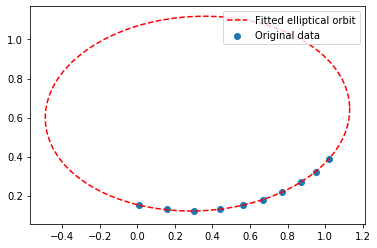

a: -2.6356254837121007 b: 0.14364618259889303 c: 0.5514469631403579 d: 3.2229403381058948 e: -0.4328942702644502


In [9]:
X = [i**2 for i in x]
a_1,b_1,c_1,d_1,e_1 = np.linalg.lstsq(solve(x,y),X,rcond=None)[0]
SE=solve_ellipse(-1,b_1,a_1,c_1,d_1,e_1)
x_line,y_line=get_ellipse(SE[0],SE[1],SE[2],SE[3],SE[4])
plt.scatter(x,y,label="Original data")
plt.plot(x_line,y_line,'r--',label="Fitted elliptical orbit")
plt.legend(loc="upper right")
plt.show()
print('a:',a_1,'b:',b_1,'c:',c_1,'d:',d_1,'e:',e_1)

## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

In [10]:
# YOUR CODE HERE
noise_x = np.random.rand(1, 10)
noise_y = np.random.rand(1, 10)

n_x = np.squeeze(noise_x)
n_y = np.squeeze(noise_y)

x_per_list = x + (2 * n_x - 1) / 200
y_per_list = y + (2 * n_y - 1) / 200

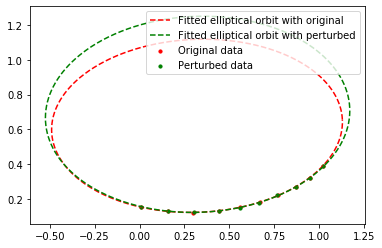

parameter after perturbation:
a: -2.2515352912634383 b: 0.10941330347194084 c: 0.5719397537648425 d: 3.055826781080353 e: -0.42372685383558956


In [11]:
X_per=[i**2 for i in x_per_list]
a_2,b_2,c_2,d_2,e_2 = np.linalg.lstsq(solve(x_per_list,y_per_list),X_per,rcond=None)[0]
SE_per=solve_ellipse(-1,b_2,a_2,c_2,d_2,e_2)
x_per_line,y_per_line=get_ellipse(SE_per[0],SE_per[1],SE_per[2],SE_per[3],SE_per[4])
plt.scatter(x,y,color="red",label="Original data", s=10)
plt.scatter(x_per_list,y_per_list,color="green",label="Perturbed data", s=10)
plt.plot(x_line,y_line,'r--',label="Fitted elliptical orbit with original")
plt.plot(x_per_line,y_per_line,'g--',label="Fitted elliptical orbit with perturbed")
plt.legend(loc="upper right")
plt.show()
print('parameter after perturbation:')
print('a:',a_2,'b:',b_2,'c:',c_2,'d:',d_2,'e:',e_2)

Effect: small perturbation caused significant difference in fitted orbits.

## (c)
Can you explain this behaviour?

YOUR ANSWER HERE

The Vandermonde matrix is rank-deficient, so the solution is very sensitive to small perturbations in the input data.  Besides, the number and location of sample points are important elements. Even if we have infinitely many points but they are on a straight line, we could not obtain an ellipse. In this problem we do not have enough sample points and they are very near to each other, so these points do not give enough information to fit the orbit. Thus even small noise in the input can cause significant deviation from the origional orbit.

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

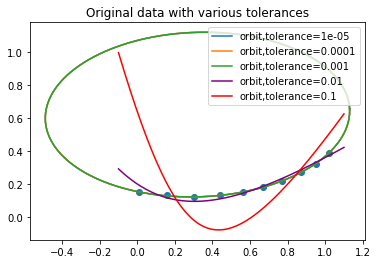

In [12]:
# YOUR CODE HERE
k_list = np.logspace(-5, -3, 3)
x_list= np.linspace(-0.1,1.1,500)

a_5,b_5,c_5,d_5,e_5=np.linalg.lstsq(solve(x,y),X,rcond=0.1)[0]
a_4,b_4,c_4,d_4,e_4=np.linalg.lstsq(solve(x,y),X,rcond=0.01)[0]

y0_list_5=[]
y1_list_5=[]
for i in x_list:
    arg=[a_5,b_5*i+d_5,c_5*i+e_5-i**2]
    #a_1*(y**2)+b_1*i*y+c_1*i+d_1*y+e_1=i**2
    y0=np.roots(arg)[0]
    y1=np.roots(arg)[1]
    y0_list_5.append(y0)
    y1_list_5.append(y1)

y0_list_4=[]
y1_list_4=[]
for i in x_list:
    arg=[a_4,b_4*i+d_4,c_4*i+e_4-i**2]
    #a_1*(y**2)+b_1*i*y+c_1*i+d_1*y+e_1=i**2
    y0=np.roots(arg)[0]
    y1=np.roots(arg)[1]
    y0_list_4.append(y0)
    y1_list_4.append(y1)

for i in k_list:
    parameters = np.linalg.lstsq(solve(x, y), X, rcond=i)[0]
    SE_i=solve_ellipse(-1,parameters[1],parameters[0],parameters[2],parameters[3],parameters[4])
    xi_line, yi_line = get_ellipse(SE_i[0], SE_i[1], SE_i[2], SE_i[3], SE_i[4])
    plt.plot(xi_line, yi_line,label="orbit,tolerance="+str(i))
    
plt.plot(x_list,y1_list_4 ,'purple',label="orbit,tolerance=0.01")
plt.plot(x_list,y1_list_5 ,'red',label="orbit,tolerance=0.1")
plt.legend(loc="upper right")
plt.scatter(x, y)
plt.title("Original data with various tolerances")
plt.show()

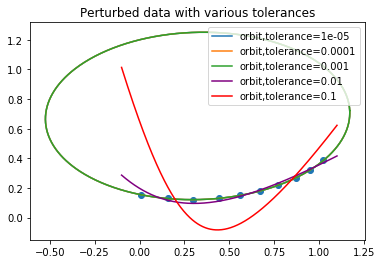

In [13]:
a_per_5,b_per_5,c_per_5,d_per_5,e_per_5=np.linalg.lstsq(solve(x_per_list,y_per_list),X_per,rcond=0.1)[0]
a_per_4,b_per_4,c_per_4,d_per_4,e_per_4=np.linalg.lstsq(solve(x_per_list,y_per_list),X_per,rcond=0.01)[0]

y0_perlist_5=[]
y1_perlist_5=[]
for i in x_list:
    arg=[a_per_5,b_per_5*i+d_per_5,c_per_5*i+e_per_5-i**2]
    #a_1*(y**2)+b_1*i*y+c_1*i+d_1*y+e_1=i**2
    y0=np.roots(arg)[0]
    y1=np.roots(arg)[1]
    y0_perlist_5.append(y0)
    y1_perlist_5.append(y1)

y0_perlist_4=[]
y1_perlist_4=[]
for i in x_list:
    arg=[a_per_4,b_per_4*i+d_per_4,c_per_4*i+e_per_4-i**2]
    #a_1*(y**2)+b_1*i*y+c_1*i+d_1*y+e_1=i**2
    y0=np.roots(arg)[0]
    y1=np.roots(arg)[1]
    y0_perlist_4.append(y0)
    y1_perlist_4.append(y1)

for i in k_list:
    parameters_perturbed = np.linalg.lstsq(solve(x_per_list, y_per_list), X_per, rcond=i)[0]
    SE_per_i=solve_ellipse(-1,parameters_perturbed[1],parameters_perturbed[0],parameters_perturbed[2],parameters_perturbed[3],parameters_perturbed[4])
    xi_per_line, yi_per_line = get_ellipse(SE_per_i[0], SE_per_i[1], SE_per_i[2], SE_per_i[3], SE_per_i[4])
    plt.plot(xi_per_line, yi_per_line,label="orbit,tolerance="+str(i))
    
plt.plot(x_list,y1_perlist_4 ,'purple',label="orbit,tolerance=0.01")
plt.plot(x_list,y1_perlist_5 ,'red',label="orbit,tolerance=0.1")
plt.legend(loc="upper right")
plt.scatter(x, y)
plt.title("Perturbed data with various tolerances")
plt.show()

The estimated parameters for k=3,4,5 is exactly the same, so there is no visual difference between these three orbits. 
For k=1,2, the sample points cannot fit an ellipse orbit, thus we plotted a branch of hyperbola for each k. This happened to both data sets(original data and perturbated data).

The resulting orbit fits the sample points better as tolerance k increases, but will not improve when k>=3.